# Taking a Look at a Feed Forward Network:
After getting a feel for the linear algebra that goes on under the hood of a feed-forward network, it's time to let PyTorch do some of the heavy lifting for us. 

This notebook defines a network with randomly initialized weights. The network is untrained, and we we take a look how a single pass of feed forward looks, implemented with PyTorch:

In [1]:
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette(sns.color_palette("Blues_d", n_colors=10, desat=1))

# Defining a Network Class:
In the last section, we saw that for a simple neural network, we needed to do randomly initialize some weight and bias matrices. We also saw that in order to feed input forward through the network, we needed to apply some basic linear algebra. PyTorch combines both of those steps using the `nn.Linear()` class. This object both initializes the weights for you, and when the time comes does all of the linear computations too:

In [2]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128,64)
        self.fc3 = nn.Linear(64, 10)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.softmax(self.fc3(x), dim=1)
        return x

The `forward()` method is what pushes our input through the network. Notice that we used a different activation function for the hidden layers. 'ReLU' stands for Rectified Linear Unit, and has proven to be a faster alternative to standard activation functions like sigmoid. 

The ReLU function is a piecewise function that returns 0 if the input is less than 0, or it returns the input unchanged if the input is greater than 0:

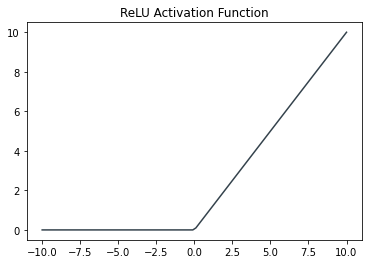

In [3]:
x = np.linspace(-10, 10, 100)
y = lambda i : 0 if i < 0 else i
plt.plot(x, [y(xi) for xi in x])
plt.title("ReLU Activation Function")
plt.show()

## Feed Forward the PyTorch Way
From here, we will load our data in the same way as last time, then perform feed-forward. This time, however, we will make use of the PyTorch network class we wrote, rather than manually doing the linear algebra and activations ourself.

First, define our transforms (The normalization isn't strictly necissary because we aren't training a network yet, but we might as well get used to doing it):

In [4]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

Next we get our MNIST dataset that is pre-loaded with the PyTorch library. Then we get our `DataLoader` going:

In [5]:
# download and load MNIST training data:
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

dataiter = iter(trainloader)
images, labels = dataiter.next()

print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


Let's create an instance of the `Network()` class we wrote above, and print out it's layer descriptions:

In [6]:
net = Network()
net

Network(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

Finally, let's call our forward method and get our predictions!

In [7]:
ps = net.forward(images.view(images.shape[0], - 1))

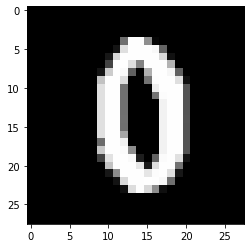

In [8]:
plt.imshow(images[0].numpy().squeeze(), cmap='Greys_r')

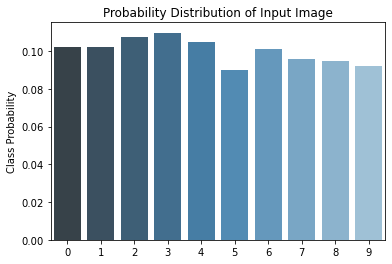

In [9]:
plt.ylabel('Class Probability')
plt.title('Probability Distribution of Input Image')
sns.barplot(x=np.arange(10), y=ps[0].detach().numpy());

As expected with an untrained network, our predictions are all over the place.